<h3> DATA ANALYSIS - Beats</h3>

1) Import Libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

2) Specify the Police District

In [3]:
district=3.0

3) Import the Chicago shotspotter data and filter for the specified district.

In [4]:
shot_data_raw = pd.read_csv('Shotspotter_data.csv')
shot_data_raw=shot_data_raw[shot_data_raw["DISTRICT"]==district]
for i in shot_data_raw.index:
    x=shot_data_raw.loc[i,"DATE"]
    x1=x.split(' ')
    x2=x1[0].split('/')
    shot_data_raw.loc[i,"time"]=x1[1]
    shot_data_raw.loc[i,'MONTH'] =int(x2[0])
    shot_data_raw.loc[i,"day"]=x2[1]
    shot_data_raw.loc[i,"YEAR"]=int(x2[2])
shot_data_raw=shot_data_raw.reset_index(drop=True)
shot_data_raw.head(5)

,DATE,BLOCK,ZIP_CODE,WARD,COMMUNITY_AREA,AREA,DISTRICT,BEAT,STREET_OUTREACH_ORGANIZATION,UNIQUE_ID,...,INCIDENT_TYPE_DESCRIPTION,ROUNDS,ILLINOIS_HOUSE_DISTRICT,ILLINOIS_SENATE_DISTRICT,LATITUDE,LONGITUDE,LOCATION,time,day,YEAR
0,1/29/2018 15:27,NaN,60637.0,20.0,GREATER GRAND CROSSING,1.0,3.0,322.0,Acclivus Greater Grand Crossing,SST-1628,...,SINGLE GUNSHOT,1,32.0,16.0,41.772790,-87.618193,POINT (-87.61819334612 41.772790345858),15:27,29,2018.0
1,1/30/2018 18:43,7000 S STONY ISLAND,60649.0,5.0,SOUTH SHORE,1.0,3.0,332.0,Claretian Associates South Shore,SST-1662,...,SINGLE GUNSHOT,1,26.0,13.0,41.766797,-87.585398,POINT (-87.58539765388 41.766797345858),18:43,30,2018.0
2,1/31/2018 1:45,NaN,60649.0,5.0,SOUTH SHORE,1.0,3.0,332.0,Claretian Associates South Shore,SST-1670,...,GUNSHOT OR FIRECRACKER,1,25.0,13.0,41.773760,-87.581308,POINT (-87.581307547471 41.773759668947),1:45,31,2018.0
3,2/1/2018 17:51,NaN,60637.0,20.0,WOODLAWN,1.0,3.0,312.0,Project H.O.O.D. Woodlawn,SST-1715,...,GUNSHOT OR FIRECRACKER,12,5.0,3.0,41.778602,-87.609718,POINT (-87.609718 41.7786015),17:51,1,2018.0
4,2/1/2018 19:29,6600 S LANGLEY AVE,60637.0,20.0,WOODLAWN,1.0,3.0,321.0,None,SST-1720,...,MULTIPLE GUNSHOTS,7,5.0,3.0,41.773794,-87.608251,POINT (-87.608250547471 41.773793668947),19:29,1,2018.0


3) Streamline the dataframe.

In [5]:
shot_data_raw=shot_data_raw[["DATE","BEAT", "YEAR","MONTH","LATITUDE","LONGITUDE","LOCATION"]]
shot_data_raw.head(5)

,DATE,BEAT,YEAR,MONTH,LATITUDE,LONGITUDE,LOCATION
0,1/29/2018 15:27,322.0,2018.0,1,41.772790,-87.618193,POINT (-87.61819334612 41.772790345858)
1,1/30/2018 18:43,332.0,2018.0,1,41.766797,-87.585398,POINT (-87.58539765388 41.766797345858)
2,1/31/2018 1:45,332.0,2018.0,1,41.773760,-87.581308,POINT (-87.581307547471 41.773759668947)
3,2/1/2018 17:51,312.0,2018.0,2,41.778602,-87.609718,POINT (-87.609718 41.7786015)
4,2/1/2018 19:29,321.0,2018.0,2,41.773794,-87.608251,POINT (-87.608250547471 41.773793668947)


4) Find the dimensions of the data

In [6]:
shot_data_raw.head()

,DATE,BEAT,YEAR,MONTH,LATITUDE,LONGITUDE,LOCATION
0,1/29/2018 15:27,322.0,2018.0,1,41.772790,-87.618193,POINT (-87.61819334612 41.772790345858)
1,1/30/2018 18:43,332.0,2018.0,1,41.766797,-87.585398,POINT (-87.58539765388 41.766797345858)
2,1/31/2018 1:45,332.0,2018.0,1,41.773760,-87.581308,POINT (-87.581307547471 41.773759668947)
3,2/1/2018 17:51,312.0,2018.0,2,41.778602,-87.609718,POINT (-87.609718 41.7786015)
4,2/1/2018 19:29,321.0,2018.0,2,41.773794,-87.608251,POINT (-87.608250547471 41.773793668947)


5) Read in the shooting event data.

In [7]:
hom_data_raw = pd.read_csv('Shooting_data.csv')
for i in hom_data_raw.index:
    x=hom_data_raw.loc[i,"Date"]
    x1=x.split(' ')
    x2=x1[0].split('/')
    hom_data_raw.loc[i,'MONTH'] =int(x2[0])
hom_data_raw.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'MONTH'],
      dtype='object')

6) Filter the shooting data for D3 and create a column "spotted" to indicate which events are linked to shotspotter incidents (note that there might be several linked shooting and shotspotter incidents based on the threshold values).

In [8]:
hom_data_raw= hom_data_raw[['Date','Beat','Year','MONTH','District','Latitude', 'Longitude','Location']]
hom_data_raw= hom_data_raw[hom_data_raw['District'] == int(district)]
hom_data_raw= hom_data_raw.reset_index(drop=True)
hom_data_raw['spotted'] = 0
hom_data_raw.columns=["DATE", "BEAT", "YEAR","MONTH","DISTRICT","LATITUDE","LONGITUDE","LOCATION","spotted"]
hom_data_raw.head(2)

,DATE,BEAT,YEAR,MONTH,DISTRICT,LATITUDE,LONGITUDE,LOCATION,spotted
0,1/2/2018 14:55,312,2018,1.0,3,41.777465,-87.617264,"(41.777464689, -87.617264087)",0
1,1/6/2018 11:12,331,2018,1.0,3,41.769885,-87.568652,"(41.769884528, -87.568652033)",0


In [9]:
hom_data_raw.head()

,DATE,BEAT,YEAR,MONTH,DISTRICT,LATITUDE,LONGITUDE,LOCATION,spotted
0,1/2/2018 14:55,312,2018,1.0,3,41.777465,-87.617264,"(41.777464689, -87.617264087)",0
1,1/6/2018 11:12,331,2018,1.0,3,41.769885,-87.568652,"(41.769884528, -87.568652033)",0
2,1/6/2018 13:00,321,2018,1.0,3,41.772273,-87.609385,"(41.772272507, -87.609385104)",0
3,2/2/2018 0:04,323,2018,2.0,3,41.761450,-87.623211,"(41.761450225, -87.623211368)",0
4,2/13/2018 0:57,322,2018,2.0,3,41.769326,-87.616119,"(41.769326209, -87.616119242)",0


Beats of District 3: 

311
312
313
314
321
322
323
324
331
332
333
334

<h3>Beat Plots </h3>


<IPython.core.display.Javascript object>


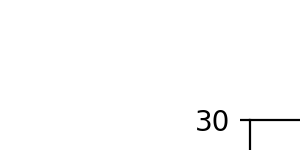

In [10]:
#Make plots
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=[10,5])
plt.ylim(0, 30)

#complete and save graph
classes=["JAN","FEB","MAR","APR","MAY","JUNE","JULY","AUG","SEP","OCT","NOV","DEC"]
ps = np.arange(len(classes))
plt.xticks(ps, classes, alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Total Number Shooting Events')
plt.title("% D3 Shooting Events Detected by ShotSpotter",size=14)

plt.savefig("D3SSLRmean.png")
plt.show()